# TensorFlow Basics and Model Training

## Introduction

TensorFlow (TF) is a numerical processing library that is widely used by machine learning and deep learning researchers or practitioners. TF is used for training and running deep neural networks. This project aims to cover the introduction of TF version 1.x and 2.0.

## Breakdown of this Notebook:
- Introduction to TensorFlow 2 and Keras packages
- Creating and Training a simple Computer Vision (CV) model.
- Tensorflow and Keras core concepts
- The TensorFlow ecosystem.

## Dataset:

The dataset can be obtain from the link: http://yann.lecun.com/exdb/mnist/

The MNIST Digits dataset contains 70,000 greyscale images that have 28 x 28 pixels for each of the image. This dataset has been a reference set over the last few years to test and improve methods for this recognition task. The Input vector for the network works out to be 28 x 28 = 784 values and it has an output of 10 values (where there are 10 different digits ranging from 0 to 9). Further, the number of hidden layers for this network will be up to the modeller. 

## Requirements:
1. TensorFlow 2.0
2. If running on GPU, requires the CUDA enabled "tensorflow-gpu"


## For AMD GPU: 
See https://plaidml.github.io/plaidml/docs/install to use it as the Backend for Keras.

In [1]:
# For those who has AMD GPU and uses PlaidML for the Keras Backend: run the following code to use AMD GPU instead.
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## 1 - Introduction to TensorFlow 2 and Keras:

This section will briefly cover the framework and provides a basic example.

## 1.1 - TensorFlow Introduction:

TF can be described as a means of deployment of Machine Learning (ML) solutions on different types of platforms such as Computer CPUs or GPUs, Mobile devices and Browsers. It also presents with the capability of being scaled up for a larger distributed computer systems. 

## 1.2 - TF Architecture:

The architecture presents with several levels of abstraction and this can be seen in the following diagram.

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0


In [3]:
import os
from IPython.display import Image




# Set up the working directory for the images:
image_folderName = 'Description Images'
image_path = os.path.abspath(image_folderName) + '/'

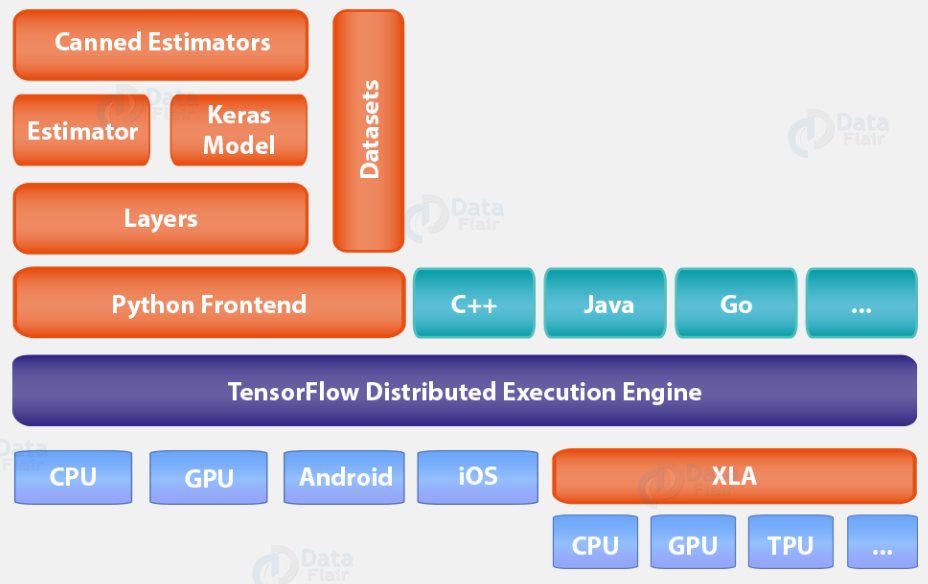

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [4]:
# TF Architecture: 
display(Image(image_path + 'TF Architecture.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

### The above diagram can be simplified into the following:

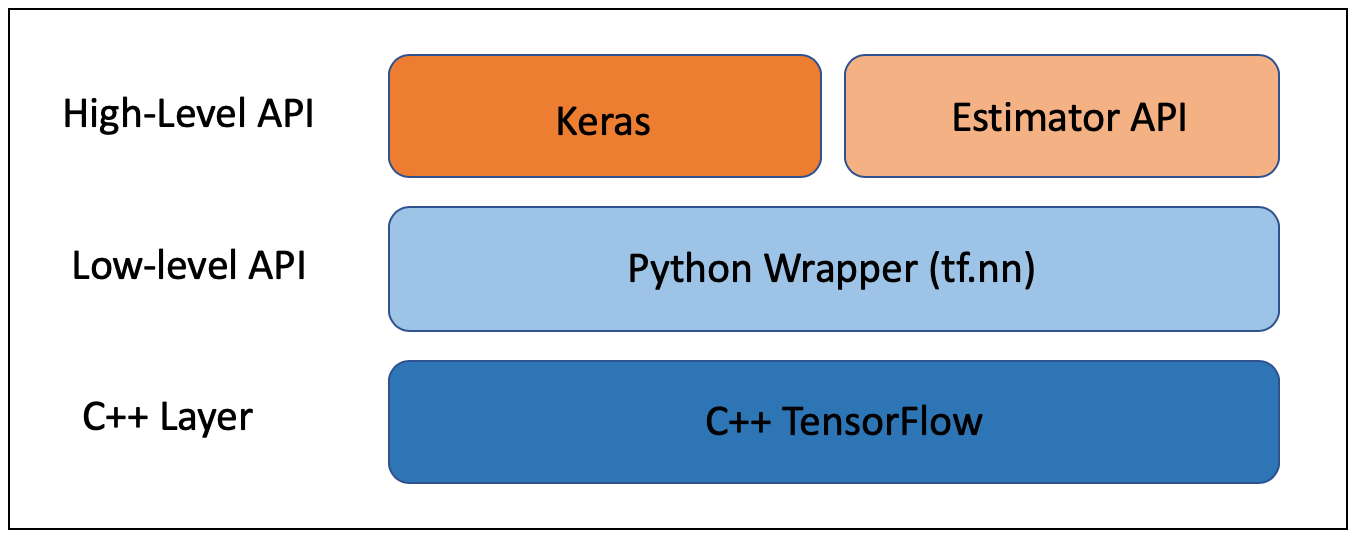

Image ref -> https://data-flair.training/blogs/tensorflow-api/


In [5]:
# TF Architecture Simplified: 
display(Image(image_path + 'TF Architecture Simplified.png', width=700, unconfined=True))
print('Image ref -> https://data-flair.training/blogs/tensorflow-api/')

From the diagram, the lowest level begins with the C++ layer, then the next level being the Low-Level API Python Wrapper and lastly the High-Level API Keras and Estimator API.

### For the C++ layer:

These computations are originally coded in C++ language. Further, to perform these operations on a GPU equiped system, TF utilises the CUDA library developed by NVIDIA. 

### For the Python Wrapper Layer:

At this level, a Python low-level API is used to wrap the C++ sources, so that when a Python method is called in TF, it will invoke the C++ code behind the scenes. THis allows for users to code with Python rather the more complex C++ language. Python also does not require any compilation.

### For the Keras and Estimator API:

At this level, there are two components that are the Keras and Estimator API. Firstly, Keras can be described as a user-friendly, modular style, and extensible wrapper for TF itself. Secondly, the Estimator API has pre-made components that streamlines the building of machine learning models. These can be considered as building blocks or rather, templates.

## 2.1 - Keras Introduction:

Keras is an interface to allow for quick experimentation of Neural Networks (NN). It relies on TF and Theano frameworks to perform and run deep learning operations. Keras is great for beginners due to its user friendliness.

### NOTE: 

In this project, the standalone version of Keras will not be used, where instead the implementation are done with "tf.keras". This is to better integrate and be more compatible with TF's other modules and the methods of saving models made. 

## 2.2 - Building a Simple CV model with Keras:

The dataset used here is the MNIST Digits. It is made of 60,000 images to be used for training and 10,000 images to be used as the testing set.


## 2.2.1 - Import the required Libraries:

In [6]:
import tensorflow as tf

## 2.2.2 - Load in the Dataset:

In [7]:
# Define the number of classes:
nb_classes = 10

# Define the sizes of each images:
img_rows, img_cols = 28, 28

# Define the colour channels: greyscale = 1/
nb_channels = 1

# Define the input shape of each image:
input_shape = (img_rows, img_cols, nb_channels)


# Load the Dataset:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise the data:
x_train, x_test = x_train / 255.0 , x_test / 255.0

## 2.2.3 - Building the Model:

Here, the model will be constructed with a simple architecture consisting of 2 Fully connected (Dense) layers, where one for the hidden layer and another for the ouput layer.

### Model in detail:

1. __Flatten__ - It takes in the 2D matrix that represents the image pixels and flattens it into a 1D array. Changing it from a 28 x 28 format to a 784 sized vector (28 x 28 = 784). 
2. __1st Dense__ - This will convert the 784 pixel values into 128 activations by multiplying the weight matrix (sized at 128, so the operation is 128 x 784) and by adding the bias matrix (sized at 128). This should output 100,480 parameters.
3. __2nd Dense__ - This will convert the 128 activations of the hidden layer into the final prediction wanted. It will output it as probabilities as the Softmax function is called ass the activation function.

In [8]:
# Instantiate the model:
model = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

## 2.2.4 - Training the Model:

It can be seen below, that the "compile()" method hass a few arguments:
1. optimizer - set to perform the gradient descent algorithm.
2. loss - set to be cross-entropy function to compute the loss.
3. metrics - return the evaluation metric that is accuracy.

The "fit()" method will fit/train the model on the training dataset. Here it is set to 5 epochs to iterate the whole dataset five times. Verbose is set to 1 to return the progress bar or ETA.

### NOTE:

The "sparse_categorical_crossentropy" set below is the same as "categorical_crossentropy", however it directly takes in the ground truth labels as its inputs, whereas  categorical_crossentropy requires a one-hot encoded labels.

In [9]:
# Compile the model:
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model.fit(
    x= x_train,
    y= y_train,
    epochs= 5,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.6277 - accuracy: 0.8410 - val_loss: 0.3499 - val_accuracy: 0.9048
Epoch 2/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.3331 - accuracy: 0.9066 - val_loss: 0.2872 - val_accuracy: 0.9190
Epoch 3/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2864 - accuracy: 0.9194 - val_loss: 0.2562 - val_accuracy: 0.9299
Epoch 4/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.2565 - accuracy: 0.9281 - val_loss: 0.2349 - val_accuracy: 0.9351
Epoch 5/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2344 - accuracy: 0.9345 - val_loss: 0.2174 - val_accuracy: 0.9389


### Observation - Model's Performance:

As it can be seen, only after 5 epochs, the model is able to obtain an accuracy score of 93.29% and a alidation accuracy of 93.66%. 

## 2.2.5 - Longer training time:

Lets experiment to see if increasing the number of epochs can improve the performance.

In [10]:
# Instantiate the model:
model2 = tf.keras.models.Sequential()

# Add the components:
# 1 -> Flatten the inputs:
model2.add(tf.keras.layers.Flatten())

# 2 -> Hidden Layer of 128 Nodes:
model2.add(tf.keras.layers.Dense(128, activation= 'relu'))

# 3 -> Output Layer: of 10 nodes, representing the 10 classes.
model2.add(tf.keras.layers.Dense(nb_classes, activation= 'softmax'))

In [11]:
# Compile the model:
model2.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Traing the Model:
model2.fit(
    x= x_train,
    y= y_train,
    epochs= 10,
    verbose= 1,
    validation_data= (x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 174us/sample - loss: 0.6764 - accuracy: 0.8290 - val_loss: 0.3631 - val_accuracy: 0.9014
Epoch 2/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.3448 - accuracy: 0.9038 - val_loss: 0.3006 - val_accuracy: 0.9160
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.2962 - accuracy: 0.9165 - val_loss: 0.2667 - val_accuracy: 0.9265
Epoch 4/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2664 - accuracy: 0.9249 - val_loss: 0.2458 - val_accuracy: 0.9302
Epoch 5/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.2440 - accuracy: 0.9310 - val_loss: 0.2271 - val_accuracy: 0.9350
Epoch 6/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2259 - accuracy: 0.9362 - val_loss: 0.2130 - val_accuracy: 0.9408
Epoch 7/10
60000/60000 [========================

### Observation - Model's Performance:

As it can be seen, only after 10 epochs, the model is able to obtain an accuracy score of 95.40% and a alidation accuracy of 95.37%. This is much better than previously seen. Perhaps increasing the epochs further would achieve a better score. 

## 3 - TensorFlow 2 and Keras:

Version TF 2 evolves to focus on simplicity and usability when compared to TF 1. This section will focus on what TensorFlow relies on to funciton.

## 3.1 - Tensors:

Tensors are mathematical objects (such as N-dimensional arrays) where it can be a scalar, vector, 3D matrix or N-dimensional matrix. A Tensor would therefore be used to store mathematical values. 

A Tensor can contain __fixed values (tf.constant)__ or __changable values (tf.Variable)__. A Tensor object should be have following:
1. Type -> can be a string, float32, float 16 or int8 etc.
2. Shape -> a scalar (n), a vector of size n (n, m) to make a 2D matrix.
3. Rank -> which is the number of dimensions, like 0 for scalar, 1 for vector and 2 for 2D matrix.

Another good example is for tensors to have __unknown shape__ such as (None, None, 3) for __Images__ of variable sizes. Here the "3" is for red, green and blue.

## 3.2 - TensorFlow Graphs:

For tasks such as Computer vision, it consists of multiple operations where for each operation, it transforms the input into output. TF will represent these operations as Directed Acyclic Graph (DAC) or referred to __graphs__. However, in TF 2, these graphs operations were moved to simplify the framework for usage. 

Below shows an example of the Graph:

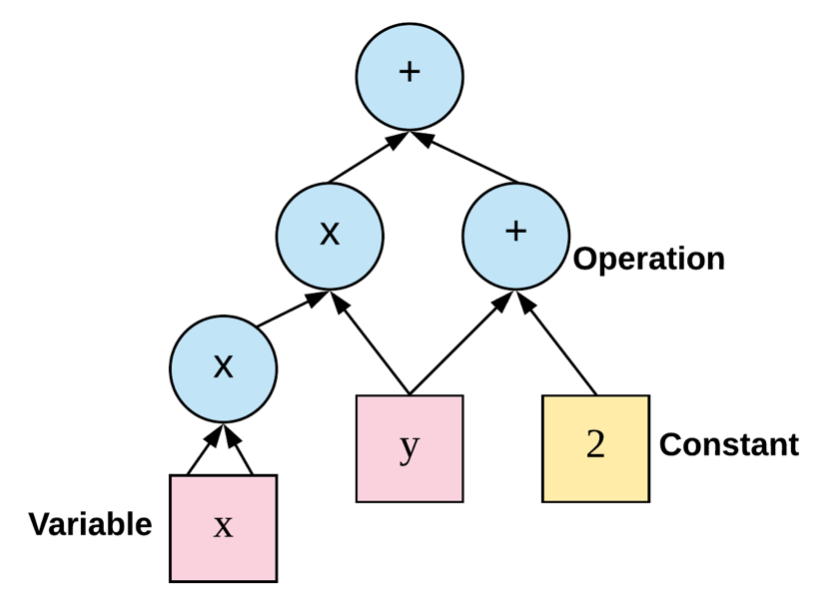

Image ref -> https://www.easy-tensorflow.com/tf-tutorials/basics/graph-and-session


In [12]:
# TF Graph: 
display(Image(image_path + 'TF Graph.png', width=400, unconfined=True))
print('Image ref -> https://www.easy-tensorflow.com/tf-tutorials/basics/graph-and-session')

The graph is composed of a series of nodes that are connected togther by edges and each of these nodes represents an operation. Relying on graphs have advantages such as:
- Running one part of the operation on the CPU and another part on GPU.
- Running parts of the graph on a distributed model/machines.
- Graph optimisations to avoid unnecessary operations for better performance.

## 3.3 - Lazy and Eager execution:

TF 2 utilises __Eager Execution__ whereas TF 1 utilises __Lazy Execution__. The term "Lazy" means that the operations are not run by the framework until requested. 

### 3.3.1 - For TF 1 (Lazy Execution): 

Taking the example of summing two vectors.
As this is a Lazy execution, the output tensor would relay that it is an "addition operation" without the results.

In [14]:
a = tf.constant( [1, 2, 3] )
b = tf.constant( [0, 0, 1] )
c = tf.add(a, b)

# print(c)
print('For TF 1 version is: Tensor("Add:0", shape=(3,), dtype=int32)')

For TF 1 version is: Tensor("Add:0", shape=(3,), dtype=int32)


### 3.3.2 - For TF 2 (Eager Execution):

As this is an Eager execution, the output tensor has the result of "[1,2,4]". The Advantages of such an execution method improves debugging and development.

In [15]:
a = tf.constant( [1, 2, 3] )
b = tf.constant( [0, 0, 1] )
c = tf.add(a, b)

print('For TF 2 version is: ', c)

For TF 2 version is:  tf.Tensor([1 2 4], shape=(3,), dtype=int32)


## 3.4 - Creating Graphs in TF 2:

The following code shows an example of graph creation and optimisation. Here, it is assumed that a, b and c are Tensor matrices and there is a need to compute for d and e. Following an Eager execution method, TF would compute "d" first then proceed onto "e". Whereas in Lazy execution methods, TF would create a graph for the operations and run a graph optimiser beforehand so it would repeat the "a * b + c" twice, the optimiser would also cache the ressult of the computation and recall the results when needed (for example, when the equation is repeated in this case). The optimiser is also able to perform in parallelism for faster compute. 

As TF 2 on the other hand uses __AutoGraph__ instead.

In [16]:
# Used in TF 1:
def compute(a, b, c):
    d = a * b + c
    e = a * b + c
    return d, e

## 3.4.1 - AutoGraph with TF 2:

TF AutoGraph module converts the Eager coding into graph and allows for the same advantages as previously mentioned such as automatic optimisation.

Note: the " @ " is a Python Decorator. This allows functions to be wrapped, the addition of functionalities and its alterations.

The AutoGraph is able to convert most Python statements (for-loops, while-loops, if statements and iterations). Generally, __AutoGraph__ should be used in these scenarios:
- Exporting model(s) to other devices.
- Performance is key and that graph optimisations are need to improve computation speeds.

In [17]:
@tf.function
def compute(a, b, c):
    d = a * b + c
    e = a * b + c
    return d, e

Further, another advantage that graphs (Not TF itself) offers is the __Automatic Differentiation__ method. This is due the inherent built in full list of operations where it provides TF with the capability to easily compute gradients for each variable. 

However, TF2's eager mode is that each of the operation is independent from each other which makes automatic differentiation not possible under default. To overcome this, __Gradient Tape__ is utilised.

## 3.5 - Backpropagation of Errors with Gradient Tape: